In [ ]:
#IMPORTS
import tensorflow as tf
import tensorflow.keras as keras

### LOAD THE DATA

CLASSES (n=9):


‘plane’ 001
‘boat’ 
‘camping car’ 
‘car’
‘pick-up’
‘tractor’
‘truck’
‘van’
‘other’



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[ 1  2  4  5  7  8  9 10 11 23 31]
(3757,)
[(1, 1377), (2, 307), (4, 190), (5, 397), (7, 4), (8, 3), (9, 101), (10, 204), (11, 955), (23, 171), (31, 48)]
[(1, 1377), (2, 307), (3, 190), (4, 397), (5, 4), (6, 3), (7, 101), (8, 204), (9, 955), (10, 171), (11, 48)]
27.302057999999988
13.223280000000045
16


,Image_ID,Bboxx,Bboxy,orientationrads,4,5,6,7,8,9,10,11,class,occludation,fully_contained
0,0,290.348971,504.611640,3.012318,277,303,304,279,502,498,508,511,2,1,0
1,1,172.413736,406.184469,-0.013888,163,182,181,164,403,403,410,410,1,1,0
2,1,206.608929,405.621843,-0.011363,196,218,218,195,402,402,409,410,7,1,0
3,2,303.293673,423.169296,1.446441,297,308,310,299,414,413,433,434,4,1,0
4,3,438.593124,445.611015,0.013333,420,458,457,420,440,440,452,451,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,1270,120.157657,425.654822,-0.021974,108,131,132,110,422,422,430,431,9,1,0
3753,1270,153.969554,423.026587,-3.098142,143,166,166,143,419,419,428,427,10,1,0
3754,1270,226.696355,147.975370,-1.516502,223,232,231,221,136,137,160,160,7,1,0
3755,1270,365.536608,139.161225,-1.528139,359,374,371,359,119,119,161,159,4,1,0


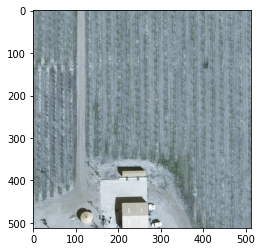

In [ ]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import csv
import numpy as np
!pip install bounding_box
from bounding_box import bounding_box as bb

from google.colab import drive


drive.mount('/content/drive')



def show_and_save(title, image, path):
    cv2.imwrite(path, image)
    # cv2.imshow(title, image)

# def saveImageWithBboxes():
    

path = "/content/drive/MyDrive/TJUAV Team/Subsystems/Programming/Computer Vision/VEDAI/"

annotations = pd.read_csv(path + 'Annotations512/Annotations512/annotation512.txt', delimiter=' ', header = None)
annotations = annotations.rename(columns={0: 'Image_ID', 1: 'Bboxx', 2:'Bboxy', 3:'orientationrads', 12: 'class', 13 : 'occludation', 14: 'fully_contained'})
classList = annotations["class"].unique()
classList.sort()
print(classList)

print(annotations['class'].shape)

counts = []

for i in classList:
    counts.append((i, np.count_nonzero(annotations['class'] == i)))

print(counts)

def normalizeRows(x):
    if(x == 1):
        return 1
    elif(x == 2):
        return 2
    if(x == 4):
        return 3
    elif(x == 5):
        return 4
    elif(x == 7):
        return 5
    elif(x == 8):
        return 6
    elif(x == 9):
        return 7
    elif(x == 10):
        return 8
    elif(x == 11):
        return 9
    elif(x == 23):
        return 10
    elif(x == 31):
        return 11


annotations['class'] = annotations['class'].apply(normalizeRows)

countsAfterNormalization = []

for i in range(1,12):
    countsAfterNormalization.append((i, np.count_nonzero(annotations['class'] == i)))

print(countsAfterNormalization)

image000 = cv2.imread(path + "1Vehicules512/Vehicules512/00000000_co.png")



# show_and_save("image000bbox", image000, "./bboutput/image000bbox.png")
# image000mod = cv2.imread("./bboutput/image000bbox.png")
# image000mod = cv2.cvtColor(image000mod, cv2.COLOR_BGR2RGB) #convert from brg to rgb
# cv2.imshow('a', image000)
# plt.imshow(image000mod)
# plt.show()
plt.imshow(image000)

annotations

def makeYVector(annotations, imageID):
    #Confidence interval of 1 for training data
    # Make sure everything is between 0 and 1
    #convert classes to catagorical
    
    #Code should go through and make a tensor of shape (s, s, vectorLength) where
    #vector length = B * (5 + c) where b is 3 and c is 9 (42)
    #box positions should be relative to the box itself  
    v1 = np.array([1])#confidence interval
    
    centerx = annotations['Bboxx'][imageID]
    centery = annotations['Bboxy'][imageID]
    topLeft = (annotations[4][imageID], annotations[8][imageID])
    topRight = (annotations[5][imageID], annotations[9][imageID])
    bottomRight = (annotations[6][imageID], annotations[10][imageID])
    bottomLeft = (annotations[7][imageID], annotations[11][imageID])
    
    # v1.append() #append the box x y positon and width and height (top left, top right, bottom right, bottom left)
    
    xDiff = [centerx - topLeft[0], topRight[0] - centerx, bottomRight[0] - centerx, centerx - bottomLeft[0]]
    yDiff = [ centery - topLeft[1],  centery - topRight[1], bottomRight[1] - centery,  bottomLeft[1] - centery]
    
    width = max(xDiff) * 2
    height = max(yDiff) * 2
    print(width)
    print(height)
    
    bboxv = np.array([centerx, centery, width, height])
    
    v = np.concatenate([bboxv, v1])
    
    classesCategorical = keras.utils.to_categorical(annotations['class'][imageID], num_classes= 11 )
    
    v = np.concatenate([v, classesCategorical])
    # print(v)
    
    return v

v = makeYVector(annotations, 0)
print(len(v))
bb.add(image000, v[0] - v[2]/2, v[1] - v[3]/2, v[0] + v[2]/2, v[1] + v[3]/2, str(annotations['class'][0]), "red" )
show_and_save("image000bbox", image000, "./bboutput/image000bbox.png")

# def makeYVectorForAllGridCells():

'''
b * (5 + c) c = 11
make a b of 3
#TODO:
make a function to display image with bounding box given the imageID
make y vectors for every grid cell (s * s * 48) give the ones that dont have an object confidence level of 0 and bbox coordinates of 0
'''

cv2.destroyAllWindows()
annotations
# print(v)




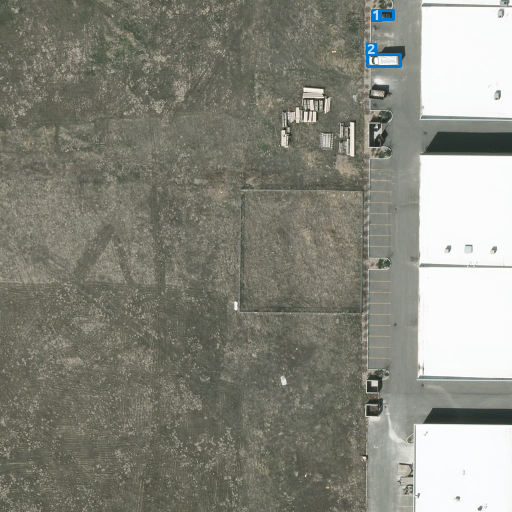

In [ ]:
from google.colab.patches import cv2_imshow
'''

#TODO:
make 16 x 16 x 3 * (vector) for every grid cell, making bounding box position relative 
to grid cell positon and not absolute posiiton acrosss the image

'''
def makeListOfObjects(annotations, imageID):
        return annotations.loc[annotations['Image_ID'] == imageID]
    
def gridContains(gridLeft, gridRight, gridTop, gridBottom, objectCenter):
    if(gridLeft <= objectCenter[0] and objectCenter[0] < gridRight):
        if(gridTop <= objectCenter[1] and objectCenter[1] < gridBottom):
            return True
        return False
    return False

def getBoundingBoxesForImageID(annotations, imageID):
    list = makeListOfObjects(annotations, imageID)
    # print(type())
    #SLICE THE PANDAS DATAFRAME LOL 
    #TODO: ^^
    newList = []
    listOfObjects = makeListOfObjects(annotations, imageID);
    # print(listOfObjects.shape)
    # print(listOfO bjects)
    
    # i = 1
    for i in listOfObjects.index:
        # print("lol")
        # print(i)
        centerx = listOfObjects['Bboxx'][i]
        centery = listOfObjects['Bboxy'][i]
        topLeft = (listOfObjects[4][i], listOfObjects[8][i])
        topRight = (listOfObjects[5][i], listOfObjects[9][i])
        bottomRight = (listOfObjects[6][i], listOfObjects[10][i])
        bottomLeft = (listOfObjects[7][i], listOfObjects[11][i])
        #TODO: DO THIS STUFF BUT ACCOUNT FOR VARYING NUMBER OF OBJECTS
        # v1.append() #append the box x y positon and width and height (top left, top right, bottom right, bottom left)
        
        xDiff = [centerx - topLeft[0], topRight[0] - centerx, bottomRight[0] - centerx, centerx - bottomLeft[0]]
        yDiff = [ centery - topLeft[1],  centery - topRight[1], bottomRight[1] - centery,  bottomLeft[1] - centery]
        
        left = np.min([topLeft[0], topRight[0], bottomRight[0], bottomLeft[0]])
        right = np.max([topLeft[0], topRight[0], bottomRight[0], bottomLeft[0]])
        
        top = np.max([topLeft[1], topRight[1], bottomRight[1], bottomLeft[1]])
        bottom = np.min([topLeft[1], topRight[1], bottomRight[1], bottomLeft[1]])
        
        leClass = listOfObjects['class'][i]
        # width = max(xDiff) * 2
        # height = max(yDiff) * 2
        width = right - left
        height = top-bottom
        newList.append([centerx, centery, width, height, leClass])
        i += 1
    return newList

def drawBoundingBoxes(annotations, imageID):
  img = cv2.imread(path + "1Vehicules512/Vehicules512/0000" + '{:04}'.format((imageID)) + "_co.png") #fix this later to work for any image even over 10
  for i in getBoundingBoxesForImageID(annotations, imageID):
    bb.add(img, i[0]-i[2]/2, i[1]-i[3]/2, i[0] + i[2]/2, i[1] + i[3]/2, str(i[4]) , "blue")
  cv2_imshow(img)

# boundingBoxResult = getBoundingBoxesForImageID(annotations, 1)
# print(boundingBoxResult)
drawBoundingBoxes(annotations,21)
# for i in range(0,100):
  # drawBoundingBoxes(annotations, i)
# print(boundingBoxResult.shape)


    

In [ ]:

specialIndexes = []


def makeVectors(annotations, imageID):
    #Confidence interval of 1 for training data
    # Make sure everything is between 0 and 1
    #convert classes to catagorical
    
    #Code should go through and make a tensor of shape (s, s, vectorLength) where
    #vector length = B * (5 + c) where b is 3 and c is 9 (42)
    #box positions should be relative to the box itself  
    s = 16
    gridWidth = 512/s #n-1 times grid with gives grid left side position
    gridHeight = 512/s #n-1 times grid height gives top side position
    
    gridLeftPos = 0
    gridRightPos = gridLeftPos + gridWidth
    gridTopPos = 0
    gridBottomPos = gridTopPos + gridHeight
    
    #make an array of all objects
    listOfObjects = getBoundingBoxesForImageID(annotations, imageID)
    
    
    vector = []
    
  
    
    for j in range (0, 16):#go through every top to bottom grid cell
        gridLeftPos = 0
        gridRightPos = gridLeftPos + gridWidth
        for k in range (0, 16): #go through every left to right grid cell
                #iterate through array of objects
            attempts = 1
            for i in listOfObjects:
                if(gridContains(gridLeftPos, gridRightPos, 
                                gridTopPos, gridBottomPos, (i[0], i[1])) and attempts > 0):
                    # print("yay")
                    normalizedPositionX = (i[0] - gridLeftPos)/gridWidth
                    normalizedPositiony = (i[1] - gridTopPos)/gridHeight
                    width = i[2]
                    height = i[3]
                    vClass = i[4]
                    classesCategorical = keras.utils.to_categorical(i[4], num_classes= 11 )
                    vectorToAdd = np.concatenate([np.array([1, normalizedPositionX, normalizedPositiony, 
                                    width, height]),  classesCategorical])
                    vector.append([vectorToAdd])
                    specialIndexes.append((j,k))
                    attempts -= 1
                elif(attempts > 0):
                    
                    vector.append(np.array([0,0,0,0,0] + [0]* 11))
                    attempts -= 1
                
                    

                        
            gridLeftPos += gridWidth
            gridRightPos += gridWidth
            
        gridTopPos += gridHeight
        gridBottomPos += gridHeight
    
    
    # v1.append() #append the box x y positon and width and height (top left, top right, bottom right, bottom left)
    
   
    
    
    return vector

vector = makeVectors(annotations, 1)
# print(len(vector))
# print(len(vector))
# print(specialIndexes)
print(vector[16 * 15 + 9])
#TODO: use the formula above to get all grids with the stuff for preproc purposes

print(getBoundingBoxesForImageID(annotations, 0))
print(getBoundingBoxesForImageID(annotations, 1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[290.348971, 504.61164, 27, 13, 2]]
[[172.413736, 406.184469, 19, 7, 1], [206.60892900000002, 405.621843, 23, 8, 7]]


In [ ]:
def isSorted(array):
  i = 0
  while(i < len(array)-1):
    if(array[i] > array[i + 1]):
      return False
    i += 1
  return True

def findMax(array, leftBound, rightBound, tupleIndex):
  max = array[leftBound][tupleIndex]
  maxPos = leftBound
  currentPos = leftBound
  for i in array[leftBound:rightBound+1]:
    if(i[tupleIndex] >= max):
      max = i[tupleIndex]
      maxPos = currentPos
    currentPos += 1
  return (max, maxPos)

def swap(array, a, b):
  tempa = array[a]
  tempb = array[b]

  array[a] = tempb
  array[b] = tempa

def selectionSort(array, tupleIndex):
  i = 0
  while(i < len(array)):
    maxPos = findMax(array, 0, len(array) -(i + 1), tupleIndex)[1]
    swap(array, maxPos, len(array) - (i + 1))
    i += 1


[(20, 19, 380), (21, 77, 1617), (71, 72, 5112), (16, 34, 544), (10, 21, 210), (79, 20, 1580), (36, 15, 540), (21, 10, 210), (38, 35, 1330)]
[172.413736, 406.184469, 21, 10, 1]
[206.60892900000002, 405.621843, 21, 10, 7]


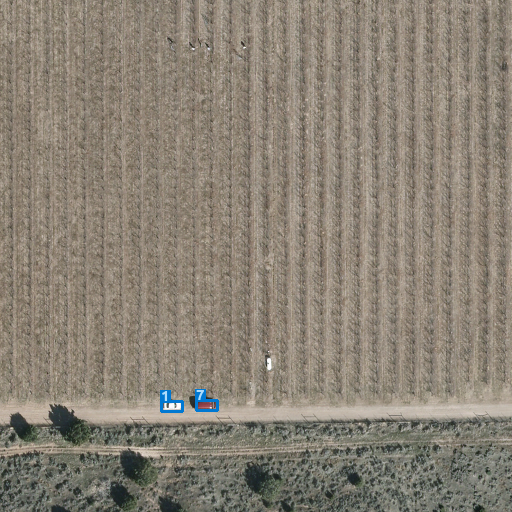

[[21, 21, 21, 10, 36, 21, 16, 21, 10, 10, 20, 21, 10, 10, 10, 10, 10, 10, 16, 16, 10, 10, 10, 20, 21, 21, 36, 36, 10, 10, 21, 21, 16, 20, 21, 21, 20, 20, 36, 36, 10, 21, 38, 21, 79, 21, 21, 21, 36, 21, 21, 36, 21, 21, 10, 10, 36, 21, 21, 21, 10, 21, 21, 38, 10, 10, 10, 16, 21, 36, 21, 20, 21, 21, 10, 20, 20, 36, 21, 20, 10, 21, 21, 10, 21, 21, 21, 21, 10, 10, 21, 16, 36, 36, 10, 10, 10, 10, 21, 21, 21, 10, 10, 10, 21, 16, 10, 10, 10, 10, 36, 20, 20, 20, 10, 10, 21, 21, 10, 36, 21, 21, 21, 10, 21, 21, 21, 16, 21, 21, 21, 21, 20, 10, 10, 20, 20, 16, 16, 10, 16, 21, 20, 38, 38, 38, 38, 38, 38, 38, 38, 21, 21, 21, 21, 21, 10, 21, 10, 10, 16, 10, 36, 21, 21, 36, 21, 16, 21, 36, 21, 21, 20, 21, 10, 10, 10, 10, 21, 21, 21, 21, 10, 10, 21, 21, 21, 21, 10, 21, 36, 20, 20, 20, 10, 20, 20, 20, 38, 20, 20, 20, 20, 20, 20, 20, 20, 21, 20, 10, 10, 16, 10, 10, 21, 21, 10, 21, 21, 21, 21, 21, 10, 16, 21, 16, 21, 10, 10, 10, 20, 10, 16, 20, 16, 20, 10, 20, 20, 20, 21, 20, 21, 21, 21, 36, 36, 21, 10, 10

,Image_ID,Bboxx,Bboxy,orientationrads,4,5,6,7,8,9,10,11,class,occludation,fully_contained,Width,Height,AnchorWidth,AnchorHeight
0,0,290.348971,504.611640,3.012318,277,303,304,279,502,498,508,511,2,1,0,27,13,21,10
1,1,172.413736,406.184469,-0.013888,163,182,181,164,403,403,410,410,1,1,0,19,7,21,10
2,1,206.608929,405.621843,-0.011363,196,218,218,195,402,402,409,410,7,1,0,23,8,21,10
3,2,303.293673,423.169296,1.446441,297,308,310,299,414,413,433,434,4,1,0,13,21,10,21
4,3,438.593124,445.611015,0.013333,420,458,457,420,440,440,452,451,4,1,0,38,12,36,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,1270,120.157657,425.654822,-0.021974,108,131,132,110,422,422,430,431,9,1,0,23,9,21,10
3753,1270,153.969554,423.026587,-3.098142,143,166,166,143,419,419,428,427,10,1,0,11,24,10,21
3754,1270,226.696355,147.975370,-1.516502,223,232,231,221,136,137,160,160,7,1,0,15,42,16,34
3755,1270,365.536608,139.161225,-1.528139,359,374,371,359,119,119,161,159,4,1,0,18,10,21,10


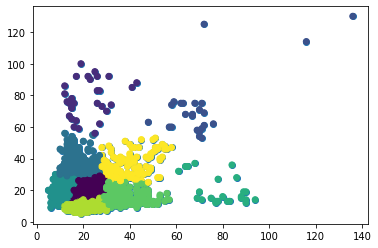

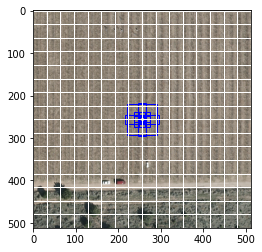

In [ ]:
'''
Using k means to find 3 ideal anchor box sizes 
'''
import os
from sklearn.cluster import KMeans
import matplotlib

def kMeansAnchors(annotations, numBoxes):
  imgs = os.listdir(path + "1Vehicules512/Vehicules512")
  imgs.sort()
  # print(imgs[-1])
  #688 images

  boundingBoxes = []
  widths = []
  heights = []
  i = 0
  while(i < len(annotations)):
    box = getBoundingBoxesForImageID(annotations, i)
    for j in box:
      boundingBoxes.append(j[2:4])
      widths.append(j[2])
      heights.append(j[3])
    i += 1

  plt.scatter(widths, heights)

  predictor =  KMeans(n_clusters = numBoxes, random_state=6969)
  res = predictor.fit_predict(boundingBoxes)
  # return res
  # print(res)
  colorops = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']
  coloropsgray = [i/10 for i in list(range(1,11))]
  colors = []
  for i in res:
    colors.append(coloropsgray[i])
  plt.scatter(widths, heights, c=colors)

  arrRedux = []
  
  for i in range(0,numBoxes):
    arrRedux.append([])

  altDims = arrRedux

  i = 0
  while(i < len(res)):
    arrRedux[res[i]].append(boundingBoxes[i])
    i += 1

  dims = []

  

  for i in arrRedux:
    widthSum = 0
    heightSum = 0
    num = 0
    for j in i:
      num += 1
      widthSum += j[0]
      heightSum += j[1]
    
    widthAvg = int(widthSum/num)
    heightAvg = int(heightSum/num)
    areaAvg = widthAvg * heightAvg

    dims.append((widthAvg, heightAvg, areaAvg))

  # print(predictor.predict(np.reshape(boundingBoxes[0], (1,-1))))
  # print(dims[4])
  #DIMS BEFORE BEING SORTED HAS THE CLASS LABEL INDeX AS THE ANCHOR BOX THIS IS SO LIT BROOOOOOO
  # selectionSort(dims, 2)
  pandaCol = [[],[]]
  for i in res:
    pandaCol[0].append(dims[i][0])
    pandaCol[1].append(dims[i][1])

  return (dims, res, pandaCol, boundingBoxes, predictor)
  

# for i in kMeansAnchors(annotations):
#   print(i)

dims, labels, pandaCol, boundingBoxes, predictor = kMeansAnchors(annotations, 9)
dimsSorted = dims.copy()
selectionSort(dimsSorted, 2)
# print(dimsSorted)

imageID = 1
img = matplotlib.image.imread(path + "/1Vehicules512/Vehicules512/0000" + '{:04}'.format((imageID)) + "_co.png")
img2 = img
figure, ax = plt.subplots(1)
count = 0

for i in dims:
  rect = matplotlib.patches.Rectangle((256-i[0]/2,256-i[1]/2),i[0],i[1], edgecolor='b', facecolor="none")
  ax.add_patch(rect)
  count += 1

for i in range(0,16):
  for j in range(0,16):
    rect = matplotlib.patches.Rectangle((i * 32 , j * 32),32,32, edgecolor='w', facecolor="none")
    ax.add_patch(rect)

# for i in range(0,32):
#   for j in range(0,32):
#     rect = matplotlib.patches.Rectangle((i * 16 , j * 16),16,16, edgecolor='r', facecolor="none")
#     ax.add_patch(rect)

# for i in range(0,64):
#   for j in range(0,64):
#     rect = matplotlib.patches.Rectangle((i * 8 , j * 8),8,8, edgecolor='g', facecolor="none")
#     ax.add_patch(rect)

ax.imshow(img)
# print(bboxes)
def reAssignAnchors(annotations, labels, dims):
  res = []
  i=0
  while(i < 688):
    # print(i)
    box = getBoundingBoxesForImageID(annotations, i)
    for j in box:
      toAdd = j[0:2]
      toAdd.append(dims[labels[i]][0])
      toAdd.append(dims[labels[i]][1])
      toAdd.append(j[4])
      res.append(toAdd)
    i += 1
  return res
# print(labels)
# print(dims)

bruh = reAssignAnchors(annotations, labels, dims )
# print(bruh)

print(dims)


def drawBoundingBoxesRedux(annotations, imageID, predictor, dims):
  img = cv2.imread(path + "1Vehicules512/Vehicules512/0000" + '{:04}'.format((imageID)) + "_co.png") #fix this later to work for any image even over 10
  toReturn = []
  for i in getBoundingBoxesForImageID(annotations, imageID):
    cluster = predictor.predict(np.reshape([i[2],i[3]], (1,-1)))
    anchor = dims[cluster[0]]
    i[2] = anchor[0]
    i[3] = anchor[1]
    # print(i)
    # print(anchor)
    bb.add(img, i[0]-i[2]/2, i[1]-i[3]/2, i[0] + i[2]/2, i[1] + i[3]/2, str(i[4]) , "blue")
    toReturn.append(i)
    print(i)
  cv2_imshow(img)
  return toReturn



bro = drawBoundingBoxesRedux(annotations, 1, predictor, dims)
print(pandaCol)

#MAKE A NEW COL WITH UPDATED ANCHORS
print(len(pandaCol[0]))

widthHeightCol = [[],[]]
for i in boundingBoxes:
  widthHeightCol[0].append(i[0])
  widthHeightCol[1].append(i[1])

annotations["Width"] = widthHeightCol[0]
annotations["Height"] = widthHeightCol[1]

annotations["AnchorWidth"] = pandaCol[0]
annotations["AnchorHeight"] = pandaCol[1]
annotations

In [ ]:
'''
make y vectors fr this time
'''

def getBoundingBoxesForImageIDRedux(annotations, imageID):
  toReturn = []
  for i in getBoundingBoxesForImageID(annotations, imageID):
    cluster = predictor.predict(np.reshape([i[2],i[3]], (1,-1)))
    anchor = dims[cluster[0]]
    i[2] = anchor[0]
    i[3] = anchor[1]
    # print(i)
    # print(anchor)
    toReturn.append(i)
  return toReturn

print(getBoundingBoxesForImageIDRedux(annotations, 1))  
specialIndexes = []
def makeVectorsRedux(annotations, imageID):
    #Confidence interval of 1 for training data
    # Make sure everything is between 0 and 1
    #convert classes to catagorical
    
    #Code should go through and make a tensor of shape (s, s, vectorLength) where
    #vector length = B * (5 + c) where b is 3 and c is 9 (42)
    #box positions should be relative to the box itself  
    s = 16
    gridWidth = 512/s #n-1 times grid with gives grid left side position
    gridHeight = 512/s #n-1 times grid height gives top side position
    
    gridLeftPos = 0
    gridRightPos = gridLeftPos + gridWidth
    gridTopPos = 0
    gridBottomPos = gridTopPos + gridHeight
    
    #make an array of all objects
    listOfObjects = getBoundingBoxesForImageIDRedux(annotations, imageID)
    
    
    vector = []
    
  
    
    for j in range (0, 16):#go through every top to bottom grid cell
        gridLeftPos = 0
        gridRightPos = gridLeftPos + gridWidth
        for k in range (0, 16): #go through every left to right grid cell
                #iterate through array of objects
            attempts = 3
            for l in range(0,attempts):
              if(l < len(listOfObjects)):
                i = listOfObjects[l]
                if(gridContains(gridLeftPos, gridRightPos, 
                                  gridTopPos, gridBottomPos, (i[0], i[1])) and attempts > 0):
                      # print("yay")
                      normalizedPositionX = (i[0] - gridLeftPos)/gridWidth
                      normalizedPositiony = (i[1] - gridTopPos)/gridHeight
                      width = i[2]
                      height = i[3]
                      vClass = i[4]
                      classesCategorical = keras.utils.to_categorical(i[4], num_classes= 11 )
                      vectorToAdd = np.concatenate([np.array([1, normalizedPositionX, normalizedPositiony, 
                                      width, height]),  classesCategorical])

                      vector.append([vectorToAdd])

                      specialIndexes.append((j,k))
                      attempts -= 1
                elif(attempts > 0):

                      vector.append(np.array([0,0,0,0,0] + [0]* 11))
                      attempts -= 1
              elif(attempts > 0):
                      
                    vector.append(np.array([0,0,0,0,0] + [0]* 11))
                    attempts -= 1
                    

                        
            gridLeftPos += gridWidth
            gridRightPos += gridWidth
            
        gridTopPos += gridHeight
        gridBottomPos += gridHeight
            # for i in listOfObjects:
         
    # v1.append() #append the box x y positon and width and height (top left, top right, bottom right, bottom left)
    
    return vector

def makeVectorsRedux(annotations, imageID):
    #Confidence interval of 1 for training data
    # Make sure everything is between 0 and 1
    #convert classes to catagorical
    
    #Code should go through and make a tensor of shape (s, s, vectorLength) where
    #vector length = B * (5 + c) where b is 3 and c is 9 (42)
    #box positions should be relative to the box itself  
    s = 16
    gridWidth = 512/s #n-1 times grid with gives grid left side position
    gridHeight = 512/s #n-1 times grid height gives top side position
    
    gridLeftPos = 0
    gridRightPos = gridLeftPos + gridWidth
    gridTopPos = 0
    gridBottomPos = gridTopPos + gridHeight
    
    #make an array of all objects
    listOfObjects = getBoundingBoxesForImageIDRedux(annotations, imageID)
    
    
    vector = []
    
  
    
    for j in range (0, 16):#go through every top to bottom grid cell
        gridLeftPos = 0
        gridRightPos = gridLeftPos + gridWidth
        for k in range (0, 16): #go through every left to right grid cell
                #iterate through array of objects
            attempts = 3
            for l in range(0,attempts):
              if(l < len(listOfObjects)):
                i = listOfObjects[l]
                if(gridContains(gridLeftPos, gridRightPos, 
                                  gridTopPos, gridBottomPos, (i[0], i[1])) and attempts > 0):
                      # print("yay")
                      normalizedPositionX = (i[0] - gridLeftPos)/gridWidth
                      # keras.activations.sigmoid()
                      normalizedPositiony = (i[1] - gridTopPos)/gridHeight
                      width = i[2]
                      # width = gridWidth/width
                      width = keras.activations.sigmoid(float(width))
                      height = i[3]
                      height = keras.activations.sigmoid(float(height))
                      # height = gridHeight/height
                      vClass = i[4]
                      classesCategorical = keras.utils.to_categorical(i[4], num_classes= 11 )
                      vectorToAdd = np.concatenate([np.array([1, normalizedPositionX, normalizedPositiony, 
                                      width, height]),  classesCategorical])

                      vector.append([vectorToAdd])

                      specialIndexes.append((j,k))
                      attempts -= 1
                elif(attempts > 0):

                      vector.append(np.array([0,0,0,0,0] + [0]* 11))
                      attempts -= 1
              elif(attempts > 0):
                      
                    vector.append(np.array([0,0,0,0,0] + [0]* 11))
                    attempts -= 1
                    

                        
            gridLeftPos += gridWidth
            gridRightPos += gridWidth
            
        gridTopPos += gridHeight
        gridBottomPos += gridHeight
            # for i in listOfObjects:
              
    # v1.append() #append the box x y positon and width and height (top left, top right, bottom right, bottom left)
     
    return vector


vector = makeVectorsRedux(annotations, 1)
print(len(vector))  
print(vector)

print(specialIndexes)
anchors = dims
selectionSort(anchors, 2)
print(anchors)


[[172.413736, 406.184469, 21, 77, 1], [206.60892900000002, 405.621843, 21, 77, 7]]
768
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 

In [ ]:
def get_test_input(imageID): #TODO MAKE A BETTER FUNCTION FOR THIS
    img = cv2.imread(path + "1Vehicules512/Vehicules512/0000" + '{:04}'.format((imageID)) + "_co.png")
    # img = cv2.resize(img, (416,416))          #Resize to the input dimension
    img_ =  img[:,:,::-1].transpose((2,0,1))  # BGR -> RGB | H X W C -> C X H X W 
    img_ = img_[np.newaxis,:,:,:]/255.0       #Add a channel at 0 (for batch) | Normalise
    img_ = tf.convert_to_tensor(img_,dtype=tf.int64)   #Convert to float
    img_ = img_.numpy()          # Convert to Variable
    return img_

input = get_test_input(0)
input = np.ndarray.flatten(input)
print(input)
for i in input:
  if i > 0:
    print(i)

[0 0 0 ... 0 0 0]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# THE NETWORK! #


In [ ]:
import tensorflow as tf
from tensorflow import keras
#TRAINING CODE (diff than normal code)

activation1 = 'relu'

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, [3,3], activation=activation1,
                                 input_shape=(416, 416, 3), padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(tf.keras.layers.Conv2D(64, [3,3], activation=activation1, padding='same' ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(tf.keras.layers.Conv2D(128, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(64, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(128, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(tf.keras.layers.Conv2D(256, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(128, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(256, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(tf.keras.layers.Conv2D(512, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(256, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(512, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(256, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(512, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(tf.keras.layers.Conv2D(1024, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(512, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(1024, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(512, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(1024, [3,3], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.Conv2D(1000, [1,1], activation= activation1, padding = 'same'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Softmax())
# model.add(tf.keras.layers.Softmax())


model.build([10,224,224,3])
print(model.summary())
# model.fit(x=)
# model.compile()
# model.fit()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 416, 416, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 208, 208, 32)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 208, 208, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 104, 104, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 104, 64)      8

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda, LeakyReLU, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import tensorflow.keras.backend as K
import tensorflow as tf

IMAGE_H = 512
IMAGE_W = 512
GRID_H = 32
GRID_W = 32
TRUE_BOX_BUFFER = 1
BOX = 3
CLASS = 11
# the function to implement the orgnization layer (thanks to github.com/allanzelener/YAD2K)
def space_to_depth_x2(x):
    return tf.nn.space_to_depth(x, block_size=2)

input_image = Input(shape=(IMAGE_H, IMAGE_W, 3))
true_boxes  = Input(shape=(1, 1, 1, TRUE_BOX_BUFFER , 4))

# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 10
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 11
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 12
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 13
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = LeakyReLU(alpha=0.1)(x)

skip_connection = x

x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 14
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 15
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 16
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 17
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 18
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
x = BatchNormalization(name='norm_18')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 19
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
x = BatchNormalization(name='norm_19')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 20
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
x = BatchNormalization(name='norm_20')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 21
skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_21')(skip_connection)
skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)

x = concatenate([skip_connection, x])

# Layer 22
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
x = BatchNormalization(name='norm_22')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 23
x = Conv2D(BOX * (4 + 1 + CLASS), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
# output = Reshape((GRID_H, GRID_W, BOX, 4 + 1 + CLASS))(x)

# # small hack to allow true_boxes to be registered when Keras build the model 
# # for more information: https://github.com/fchollet/keras/issues/2790
# output = Lambda(lambda args: args[0])([output, true_boxes])

model = Model([input_image, true_boxes])
model.build((10, 512, 512, 3))
# model.build([10, 512, 512, 3])
model.summary()

NotImplementedError: ignored

In [ ]:

    # if(list.shape[0] == 15):
    #     centerx = list[1]
    #     centery = list[2]
    #     topLeft = (list[4], list[8])
    #     topRight = (list[5], list[9])
    #     bottomRight = (list[6], list[10])
    #     bottomLeft = (list[7], list[11])
        
    #     xDiff = [centerx - topLeft[0], topRight[0] - centerx, bottomRight[0] - centerx, centerx - bottomLeft[0]]
    #     yDiff = [ centery - topLeft[1],  centery - topRight[1], bottomRight[1] - centery,  bottomLeft[1] - centery]
        
    #     width = max(xDiff) * 2
    #     height = max(yDiff) * 2
    #     newList.append([centerx, centery, width, height ])
    # else:
    #     for i in list:
    #         centerx = list[i][1]
    #         centery = list[i][2]
    #         topLeft = (list[i][4], list[i][8])
    #         topRight = (list[i][5], list[i][9])
    #         bottomRight = (list[i][6], list[i][10])
    #         bottomLeft = (list[i][7], list[i][11])
    #         xDiff = [centerx - topLeft[0], topRight[0] - centerx, bottomRight[0] - centerx, centerx - bottomLeft[0]]
    #         yDiff = [ centery - topLeft[1],  centery - topRight[1], bottomRight[1] - centery,  bottomLeft[1] - centery]
            
    #         width = max(xDiff) * 2
    #         height = max(yDiff) * 2
    #         newList.append([centerx, centery, width, height ])